## Play w/ the Fake News dataset

In [48]:
import json
import subprocess
import sys
import time

import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import lib

In [3]:
%ls testdata/FakeNewsNet/Data/BuzzFeed/RealNewsContent/BuzzFeed_Real_1-Webpage.json

testdata/FakeNewsNet/Data/BuzzFeed/RealNewsContent/BuzzFeed_Real_1-Webpage.json


In [4]:
doc2vec = lib.Doc2Vec('./model/GoogleNews-vectors-negative300-SLIM.bin')

In [5]:
NPOINTS = 10
file_pattern = 'testdata/FakeNewsNet/Data/BuzzFeed/{0:s}NewsContent/BuzzFeed_{0:s}_{1:d}-Webpage.json'

doc_contents = {}
doc_vectors = {}
for group in ['Fake', 'Real']:
    for file_index in range(NPOINTS):
        with open(file_pattern.format(group, file_index + 1)) as f:
            doc = json.load(f)
            contents = '{}\n{}\n{}'.format(doc['title'], doc['text'], ', '.join(doc.get('authors', '')))
            doc_key = '{}_{}'.format(group, file_index)
            doc_contents[doc_key] = contents
            doc_vectors[doc_key] = doc2vec.get_vector(contents)

OOV words: {'s**t', 'of', '“', ',', ':', 'a', '’', 'to', '‘'}
OOV words: {'⋆', 'of', 'and', ',', 'to', '2012', "'Tool", "'"}
OOV words: {'–', 'of', '“', '”', '.', '’', 'a', '?', 'to'}
OOV words: {'ree-tards', '100percentfedUp.com', "''", 'f*g', 'of', '“', 'and', '”', '.', ':', 'a', '``', '’', 'to', '?', '*'}
OOV words: {',', '(', '.', '’', "'Reporters", 'to', '!', "'", ')', 'Clintons'}
OOV words: {'Anti-Muslim', 'Rahami', '–', 'of', 'anti-Muslim', ',', '.'}
OOV words: {'–', 'and', '“', 'of', 'pay-to-play', '”', 'then-Secretary', ',', 'to', ';', '%', '5.7'}
OOV words: {'scumbags', 'Scumbags', ',', '.', '’'}
OOV words: {'2004', ',', '.', '’', '?', 'racist…', '…'}
OOV words: {'watered-down', '–', 'and', '“', 'of', '”', 'Watered-Down', '(', ':', 'HIV/AIDs', ',', 'a', 'to', 'Sub-Saharan', ')', 'sub-Saharan'}
OOV words: {'29', '–', 'and', '8:30', ',', '.', 'to', '17', '23', 'NYC…Why'}
OOV words: {"''", 'of', "have'", "'too", ',', ':', '``'}
OOV words: {'2016', 'of', 'and', ',', '.', ':', 'a'

In [6]:
df = pd.DataFrame(doc_vectors)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

cosines = cosine_similarity(df.values.T)
df_cosines = pd.DataFrame(cosines, columns=df.columns, index=df.columns)
for c in df.columns:
    df_cosines.loc[c, c] = None

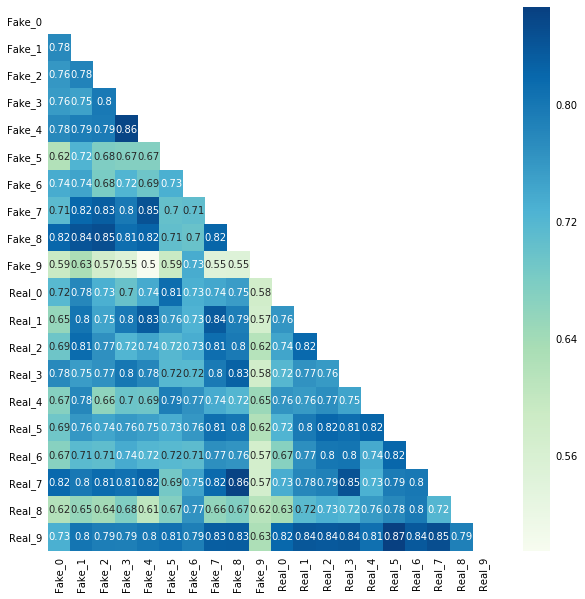

In [8]:
plt.rcParams['figure.figsize']=(10,10)

mask = np.zeros_like(df_cosines)
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(df_cosines, mask=mask, annot=True, cmap="GnBu")

In [9]:
most_similar = df_cosines.idxmax()
for a, b in zip(most_similar.index, most_similar.values):
    print(a, b, df_cosines.loc[a, b])
#     print('-' * 80)
#     print('{}\n{}\n{}'.format(doc_contents[a][:300], '-' * 80, doc_contents[b][:300]))
    print('=' * 80)

Fake_0 Fake_8 0.82066363
Fake_1 Fake_8 0.8420569
Fake_2 Fake_8 0.8501816
Fake_3 Fake_4 0.86014026
Fake_4 Fake_3 0.86014026
Fake_5 Real_0 0.8131933
Fake_6 Real_9 0.79027605
Fake_7 Fake_4 0.845738
Fake_8 Real_7 0.8631584
Fake_9 Fake_6 0.7345447
Real_0 Real_9 0.8198244
Real_1 Real_9 0.83919346
Real_2 Real_9 0.83745164
Real_3 Real_7 0.8451551
Real_4 Real_5 0.82230204
Real_5 Real_9 0.86649513
Real_6 Real_9 0.8366865
Real_7 Fake_8 0.8631584
Real_8 Real_6 0.7967021
Real_9 Real_5 0.86649513


## Sending some requests

In [14]:
%%sh
curl http://localhost:8000/vote -d "url=https://www.bbc.com/news/world-us-canada-45517260" -d "user=u2" -d "ranking=2.0" -X PUT

"Success!"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    84  100    11  100    73      8     58  0:00:01  0:00:01 --:--:--    58


In [15]:
%%sh
curl http://localhost:8000/storage -d "url=https://www.bbc.com/news/world-us-canada-45532679" -X PUT

[[0.8607050180435181, "{\"url\": \"https://www.bbc.com/news/world-us-canada-45517260\", \"content\": \"deadly of a storm ravages playback is unsupported on your captiongusts the impact of the people have been killed as florence mauls the us east knocking out power for hundreds of thousands of homes and downing weather event has been downgraded from a hurricane to a tropical storm but forecasters s...\"}"]]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   463  100   410  100    53    354     45  0:00:01  0:00:01 --:--:--   354


In [20]:
%%sh
curl http://localhost:8000/storage -d "url=https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html" -X PUT

[[0.8081446290016174, "{\"url\": \"https://www.bbc.com/news/world-us-canada-45532679?intlink_from_url=&link_location=live-reporting-story\", \"content\": \"hurricane florence strikes the eastern guide to the deadliest are violent storms that can bring devastation to coastal threatening homes and develop from fuelled by moist air as they cross air rises into the swirls in to fill the low pressure in the sucking air in and reinforcing the low storm ro...\"}"], [0.7855542898178101, "{\"url\": \"https://www.bbc.com/news/world-us-canada-45517260\", \"content\": \"deadly of a storm ravages playback is unsupported on your captiongusts the impact of the people have been killed as florence mauls the us east knocking out power for hundreds of thousands of homes and downing weather event has been downgraded from a hurricane to a tropical storm but forecasters s...\"}"]]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   944  100   872  100    72    685     56  0:00:01  0:00:01 --:--:--   685


In [18]:
%%sh
curl http://localhost:8000/vote -d "url=https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html" -d "user=u2" -d "ranking=2.0" -X PUT

"Success!"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   103  100    11  100    92      8     68  0:00:01  0:00:01 --:--:--    68


In [19]:
%%sh
curl http://localhost:8000/storage -d "url=https://ipython.readthedocs.io/en/stable/interactive/magics.html" -X PUT

[[0.8590534329414368, "{\"url\": \"https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html\", \"content\": \"numpy the arithmetic mean along the specified the average of the array the average is taken over the flattened array by otherwise over the specified intermediate and return values are used for integer containing numbers whose mean is if is not an a conversion is none or int or tuple of or axes al...\"}"], [0.7817232608795166, "{\"url\": \"https://www.bbc.com/news/world-us-canada-45532679?intlink_from_url=&link_location=live-reporting-story\", \"content\": \"hurricane florence strikes the eastern guide to the deadliest are violent storms that can bring devastation to coastal threatening homes and develop from fuelled by moist air as they cross air rises into the swirls in to fill the low pressure in the sucking air in and reinforcing the low storm ro...\"}"], [0.73563152551651, "{\"url\": \"https://www.bbc.com/news/world-us-canada-45517260\", \"content\": \"deadly of

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1366  100  1298  100    68    560     29  0:00:02  0:00:02 --:--:--   560


## Play w/ the custom dataset by Sergey

In [ ]:
urls = []
group = None
with open('./testdata/news_urls.txt') as f:
    for line in f:
        if line.startswith('http'):
            url = line.rstrip()
            urls.append((group, url))
            print(url)
            command = 'curl http://localhost:8000/vote -d "url={}" -d "user=u2" -d "ranking=2.0" -X PUT'.format(url)
            subprocess.call(command, shell=True)
            time.sleep(1)
        else:
            group = line.rstrip()
            print(group)

https://www.coindesk.com/circle-survey-finds-twice-as-many-men-invest-in-cryptocurrencies-as-women/
https://www.coindesk.com/brave-launches-legal-offensive-on-google-ads-data-collection-practices/
https://www.coindesk.com/ethereums-constantinople-hard-fork-to-activate-on-testnet-in-october/
https://www.coindesk.com/ether-records-highest-daily-trading-volume-in-12-months/
https://www.ccn.com/bmw-partners-blockchain-startup-to-develop-customer-lending-solution/
https://www.ccn.com/mastercard-thinks-blockchain-can-simplify-b2b-transactions-in-new-patent/https://www.ccn.com/medici-ventures-latest-blockchain-investment-bridges-fiat-with-crypto/
https://www.ccn.com/nerdy-australian-pm-pushes-blockchain-agenda-to-take-on-big-banks/
https://www.ccn.com/blockchain-could-bring-1-1-trillion-in-new-global-trade-says-wef/
https://www.ccn.com/ubers-largest-shareholder-prototypes-a-blockchain-for-mobile-cross-carrier-payments/
https://www.ccn.com/bitcoin-industry-launches-d-c-lobbying-group-to-promot

In [ ]:
url_to_group = {url: group for group, url in urls}

In [ ]:
for group, url in urls:
    command = 'curl http://localhost:8000/storage -d "url={}" -X PUT'.format(url)
    print(group, command)
    out=subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(out.stdout)